### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


### Import the Dataset

In [3]:
df = pd.read_excel(r'Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2020-103800,2020-01-03,2020-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2020-141817,2020-01-05,2020-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Customer Name   10194 non-null  object        
 7   Segment         10194 non-null  object        
 8   Country/Region  10194 non-null  object        
 9   City            10194 non-null  object        
 10  State/Province  10194 non-null  object        
 11  Postal Code     10194 non-null  object        
 12  Region          10194 non-null  object        
 13  Product ID      10194 non-null  object        
 14  Category        10194 non-null  object        
 15  Su

In [5]:
df.shape

(10194, 21)

In [6]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,10194.000000,10194,10194,10194.000000,10194.000000,10194.000000,10194.000000
mean,5097.500000,2022-04-29 16:37:51.453796608,2022-05-03 15:41:38.175397120,228.225854,3.791838,0.155385,28.673417
min,1.000000,2020-01-03 00:00:00,2020-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2549.250000,2021-05-14 00:00:00,2021-05-19 00:00:00,17.220000,2.000000,0.000000,1.760800
50%,5097.500000,2022-06-25 00:00:00,2022-06-28 00:00:00,53.910000,3.000000,0.200000,8.690000
75%,7645.750000,2023-05-14 00:00:00,2023-05-18 00:00:00,209.500000,5.000000,0.200000,29.297925
max,10194.000000,2023-12-30 00:00:00,2024-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2942.898656,NaN,NaN,619.906839,2.228317,0.206249,232.465115


In [7]:
df['Order Date'].min(),df['Order Date'].max()

(Timestamp('2020-01-03 00:00:00'), Timestamp('2023-12-30 00:00:00'))

### Recency of Each Customer

In [8]:
df_recency = df.groupby(by='Customer Name', as_index=False)['Order Date'].max()
df_recency.head()

,Customer Name,Order Date
0,Aaron Bergman,2022-11-10
1,Aaron Hawkins,2023-12-18
2,Aaron Smayling,2023-10-03
3,Adam Bellavance,2023-11-06
4,Adam Hart,2023-11-26


In [9]:
df_recency.columns = ['CustomerName','LastPurcahseDate']
df_recency.head()

,CustomerName,LastPurcahseDate
0,Aaron Bergman,2022-11-10
1,Aaron Hawkins,2023-12-18
2,Aaron Smayling,2023-10-03
3,Adam Bellavance,2023-11-06
4,Adam Hart,2023-11-26


In [10]:
recent_date = df_recency['LastPurcahseDate'].max()
recent_date

Timestamp('2023-12-30 00:00:00')

In [11]:
df_recency['Recency']=df_recency['LastPurcahseDate'].apply(lambda x: (recent_date-x).days)
df_recency.head()

,CustomerName,LastPurcahseDate,Recency
0,Aaron Bergman,2022-11-10,415
1,Aaron Hawkins,2023-12-18,12
2,Aaron Smayling,2023-10-03,88
3,Adam Bellavance,2023-11-06,54
4,Adam Hart,2023-11-26,34


### Frequency of Each Customer

In [12]:
frequency_df = df.drop_duplicates().groupby(by=['Customer Name'], as_index=False)['Order Date'].count()
frequency_df.head()

,Customer Name,Order Date
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,18
4,Adam Hart,20


In [13]:
frequency_df.columns = ['CustomerName','Frequency']
frequency_df.head()

,CustomerName,Frequency
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,18
4,Adam Hart,20


### Monetary Value of Each Customer

In [14]:
df['Total'] = df['Sales']*df['Quantity']
Monetary_df = df.groupby(by='Customer Name', as_index=False)['Total'].sum()
Monetary_df.head()

,Customer Name,Total
0,Aaron Bergman,1984.480
1,Aaron Hawkins,11459.552
2,Aaron Smayling,9088.880
3,Adam Bellavance,35390.580
4,Adam Hart,9664.265


In [15]:
Monetary_df.columns = ['CustomerName','Monetary']
Monetary_df.head()

,CustomerName,Monetary
0,Aaron Bergman,1984.480
1,Aaron Hawkins,11459.552
2,Aaron Smayling,9088.880
3,Adam Bellavance,35390.580
4,Adam Hart,9664.265


### Creating an RFM Dataframe

In [16]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(Monetary_df, on='CustomerName' ).drop(columns='LastPurcahseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Aaron Bergman,415,6,1984.480
1,Aaron Hawkins,12,11,11459.552
2,Aaron Smayling,88,10,9088.880
3,Adam Bellavance,54,18,35390.580
4,Adam Hart,34,20,9664.265


### The Above Code is done one by one 

In [17]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rf_df

,CustomerName,LastPurcahseDate,Recency,Frequency
0,Aaron Bergman,2022-11-10,415,6
1,Aaron Hawkins,2023-12-18,12,11
2,Aaron Smayling,2023-10-03,88,10
3,Adam Bellavance,2023-11-06,54,18
4,Adam Hart,2023-11-26,34,20
...,...,...,...,...
795,Xylona Preis,2023-11-17,43,34
796,Yana Sorensen,2023-12-21,9,12
797,Yoseph Carroll,2023-12-26,4,8
798,Zuschuss Carroll,2023-11-06,54,31


In [18]:
rfm_df = rf_df.merge(Monetary_df, on='CustomerName' )
rfm_df

,CustomerName,LastPurcahseDate,Recency,Frequency,Monetary
0,Aaron Bergman,2022-11-10,415,6,1984.480
1,Aaron Hawkins,2023-12-18,12,11,11459.552
2,Aaron Smayling,2023-10-03,88,10,9088.880
3,Adam Bellavance,2023-11-06,54,18,35390.580
4,Adam Hart,2023-11-26,34,20,9664.265
...,...,...,...,...,...
795,Xylona Preis,2023-11-17,43,34,9183.576
796,Yana Sorensen,2023-12-21,9,12,46478.992
797,Yoseph Carroll,2023-12-26,4,8,27208.926
798,Zuschuss Carroll,2023-11-06,54,31,40212.889


In [19]:
rfm_df = rf_df.merge(Monetary_df, on='CustomerName' ).drop(columns='LastPurcahseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Aaron Bergman,415,6,1984.480
1,Aaron Hawkins,12,11,11459.552
2,Aaron Smayling,88,10,9088.880
3,Adam Bellavance,54,18,35390.580
4,Adam Hart,34,20,9664.265


In [20]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# Normalising the Rank of the Customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,415,6,1984.480,71.5,103.5,87.0,8.959900,12.9375,10.875
1,Aaron Hawkins,12,11,11459.552,719.5,362.5,447.0,90.162907,45.3125,55.875
2,Aaron Smayling,88,10,9088.880,364.5,305.0,369.0,45.676692,38.1250,46.125
3,Adam Bellavance,54,18,35390.580,470.5,646.0,736.0,58.959900,80.7500,92.000
4,Adam Hart,34,20,9664.265,577.0,694.0,390.0,72.305764,86.7500,48.750


In [21]:
rfm_df.drop(['R_rank','M_rank','F_rank'],axis=1,inplace=True)
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,415,6,1984.480,8.959900,12.9375,10.875
1,Aaron Hawkins,12,11,11459.552,90.162907,45.3125,55.875
2,Aaron Smayling,88,10,9088.880,45.676692,38.1250,46.125
3,Adam Bellavance,54,18,35390.580,58.959900,80.7500,92.000
4,Adam Hart,34,20,9664.265,72.305764,86.7500,48.750


### RFM Score

In [22]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28*rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df[['CustomerName','RFM_Score']]

,CustomerName,RFM_Score
0,Aaron Bergman,11.165235
1,Aaron Hawkins,58.060686
2,Aaron Smayling,43.817754
3,Adam Bellavance,83.893985
4,Adam Hart,62.923365
...,...,...
795,Xylona Preis,64.190545
796,Yana Sorensen,82.535047
797,Yoseph Carroll,70.508271
798,Zuschuss Carroll,89.897735


In [23]:
rfm_df[['CustomerName','RFM_Score']].max()

CustomerName    Zuschuss Donatelli
RFM_Score                96.467021
dtype: object

In [24]:
# Converting the RFM_Score in the range of 0-5 from 0-100
rfm_df['RFM_Score'] *=0.05 

In [25]:
rfm_df[['CustomerName','RFM_Score']].max()

CustomerName    Zuschuss Donatelli
RFM_Score                 4.823351
dtype: object

In [26]:
rfm_df['Customer_Segment'] = np.where(rfm_df['RFM_Score']>4.5,'Top Customers',
                                    (np.where(rfm_df['RFM_Score']>4,'HIgh Value Customer',
                                    (np.where(rfm_df['RFM_Score']>3,'Medium Value Customer',
                                    (np.where(rfm_df['RFM_Score']>1.5,'Low Value Customers','Lost Customers')))))))

rfm_df[['CustomerName','RFM_Score', 'Customer_Segment']].head()

,CustomerName,RFM_Score,Customer_Segment
0,Aaron Bergman,0.558262,Lost Customers
1,Aaron Hawkins,2.903034,Low Value Customers
2,Aaron Smayling,2.190888,Low Value Customers
3,Adam Bellavance,4.194699,HIgh Value Customer
4,Adam Hart,3.146168,Medium Value Customer


In [27]:
?rfm_df.plot

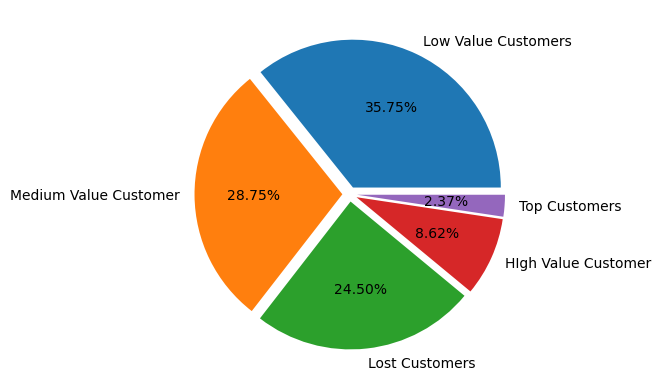

In [28]:
rfm_df['Customer_Segment'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0.05,0.05,0.05,0.05,0.05]);
plt.ylabel(" ");

## Conclusion:  
### The RFM analysis reveals a distribution where 24.50% are categorized as Lost Customers, 35.75% as Low Value Customers, 8.62% as High Value Customers, and 28.75% as Medium Value Customers. The concentration of customers in the low and medium segments suggests a need for targeted retention strategies to boost value.